In [1]:
# Install scikit-learn and scipy
!pip install scikit-learn
!pip install scipy

In [2]:
# Import necessary libraries
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
from scipy.sparse import csr_matrix

In [3]:
# Import necessary libraries.
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
from scipy.sparse import csr_matrix

In [4]:
# Provide the path to your CSV file
file_path = '/content/trans_prep_recommendation_final.csv'

# Read the CSV file into a DataFrame
df = pd.read_csv(file_path)

In [5]:
df.head()

,ent,Product_Code,Product_Qty_sum,cluster_labels
0,TCC4ZJRW43B,XC4CCW,1,cluster_0
1,TCC4ZQWCEQU,XC4CCW,1,cluster_0
2,TCC4ZW1RER5,XC4CCW,1,cluster_0
3,TCCECC3RRWK,XC4CCW,1,cluster_0
4,TCCECC3RZJ0,XC4CCW,1,cluster_0


In [6]:
User_Item_matrix = df.pivot_table(
    index='ent',
    columns='Product_Code',
    values='Product_Qty_sum',
    aggfunc='sum'
)

In [7]:
User_Item_matrix.shape

(261158, 509)

In [8]:
# Update illustration of the matrix, 1 to represent customer have purchased item, 0 to represent customer haven't purchased.
User_Item_matrix = User_Item_matrix.applymap(lambda x: 1 if x > 0 else 0)

In [9]:
# Read header of User vs Item matrix.
User_Item_matrix.head()

Product_Code,0C1CC1,0C1CC4,0C1CCE,0C4C43,0C4C4C,0C4C4Q,0C4C4W,0C4C4Z,0C4CC1,0C4CC3,...,XC4CCZ,XCECC4,XCECCJ,XCECCQ,XCJC4C,XCJCC3,XCJCCZ,XCQCC4,XP9LI,YC1CC4
ent,,,,,,,,,,,,,,,,,,,,,
884R4EJZ0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
884RC4REI,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8C4ECCCC44F,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8CC1CCCC3E0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8CCCCCC4R1F,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
# Create Item to Item similarity matrix.
item_item_similarity_matrix = pd.DataFrame(
    cosine_similarity(User_Item_matrix.T)
)

In [11]:
# Display header of Item to Item similarity matrix.
item_item_similarity_matrix.head()

,0,1,2,3,4,5,6,7,8,9,...,499,500,501,502,503,504,505,506,507,508
0,1.000000,0.096566,0.069872,0.021917,0.023399,0.102975,0.061499,0.021844,0.009512,0.045363,...,0.015084,0.026737,0.048843,0.081725,0.029411,0.053489,0.015694,0.013573,0.030365,0.151961
1,0.096566,1.000000,0.100079,0.028174,0.022326,0.056907,0.065107,0.020528,0.008443,0.030081,...,0.004120,0.020765,0.079806,0.092023,0.017561,0.042606,0.009950,0.022241,0.022208,0.107251
2,0.069872,0.100079,1.000000,0.015441,0.026293,0.073355,0.063579,0.026251,0.011660,0.041331,...,0.015172,0.009559,0.057604,0.101840,0.039330,0.069209,0.008245,0.033940,0.034542,0.195502
3,0.021917,0.028174,0.015441,1.000000,0.007818,0.020774,0.024757,0.008587,0.000000,0.029617,...,0.000000,0.011167,0.010200,0.016982,0.001787,0.041243,0.022473,0.003101,0.007305,0.025999
4,0.023399,0.022326,0.026293,0.007818,1.000000,0.022109,0.021079,0.004985,0.012300,0.014833,...,0.000000,0.008643,0.021531,0.018402,0.004149,0.011528,0.000000,0.000000,0.005026,0.026437


In [12]:
# Update index to corresponding Item Code (StockCode).
item_item_similarity_matrix.columns =User_Item_matrix.T.index
item_item_similarity_matrix['Product_Code'] = User_Item_matrix.T.index
item_item_similarity_matrix = item_item_similarity_matrix.set_index('Product_Code')

In [13]:
# Display header of Item to Item similarity matrix.
item_item_similarity_matrix.head()

Product_Code,0C1CC1,0C1CC4,0C1CCE,0C4C43,0C4C4C,0C4C4Q,0C4C4W,0C4C4Z,0C4CC1,0C4CC3,...,XC4CCZ,XCECC4,XCECCJ,XCECCQ,XCJC4C,XCJCC3,XCJCCZ,XCQCC4,XP9LI,YC1CC4
Product_Code,,,,,,,,,,,,,,,,,,,,,
0C1CC1,1.000000,0.096566,0.069872,0.021917,0.023399,0.102975,0.061499,0.021844,0.009512,0.045363,...,0.015084,0.026737,0.048843,0.081725,0.029411,0.053489,0.015694,0.013573,0.030365,0.151961
0C1CC4,0.096566,1.000000,0.100079,0.028174,0.022326,0.056907,0.065107,0.020528,0.008443,0.030081,...,0.004120,0.020765,0.079806,0.092023,0.017561,0.042606,0.009950,0.022241,0.022208,0.107251
0C1CCE,0.069872,0.100079,1.000000,0.015441,0.026293,0.073355,0.063579,0.026251,0.011660,0.041331,...,0.015172,0.009559,0.057604,0.101840,0.039330,0.069209,0.008245,0.033940,0.034542,0.195502
0C4C43,0.021917,0.028174,0.015441,1.000000,0.007818,0.020774,0.024757,0.008587,0.000000,0.029617,...,0.000000,0.011167,0.010200,0.016982,0.001787,0.041243,0.022473,0.003101,0.007305,0.025999
0C4C4C,0.023399,0.022326,0.026293,0.007818,1.000000,0.022109,0.021079,0.004985,0.012300,0.014833,...,0.000000,0.008643,0.021531,0.018402,0.004149,0.011528,0.000000,0.000000,0.005026,0.026437


In [14]:
# Randomly pick item (0C1CC1) to display the most similar StockCode.
top_10_similar_items = list(
    item_item_similarity_matrix\
        .loc['0C1CC1']\
        .sort_values(ascending=False)\
        .iloc[:10]\
    .index
)

In [15]:
top_10_similar_items

['0C1CC1',
 'KC4C3Z',
 '8C4CEW',
 '8C4CCR',
 '6C1CCE',
 '6CQC4R',
 'KCECWJ',
 '2C4CCR',
 'YC1CC4',
 '6CQC41']

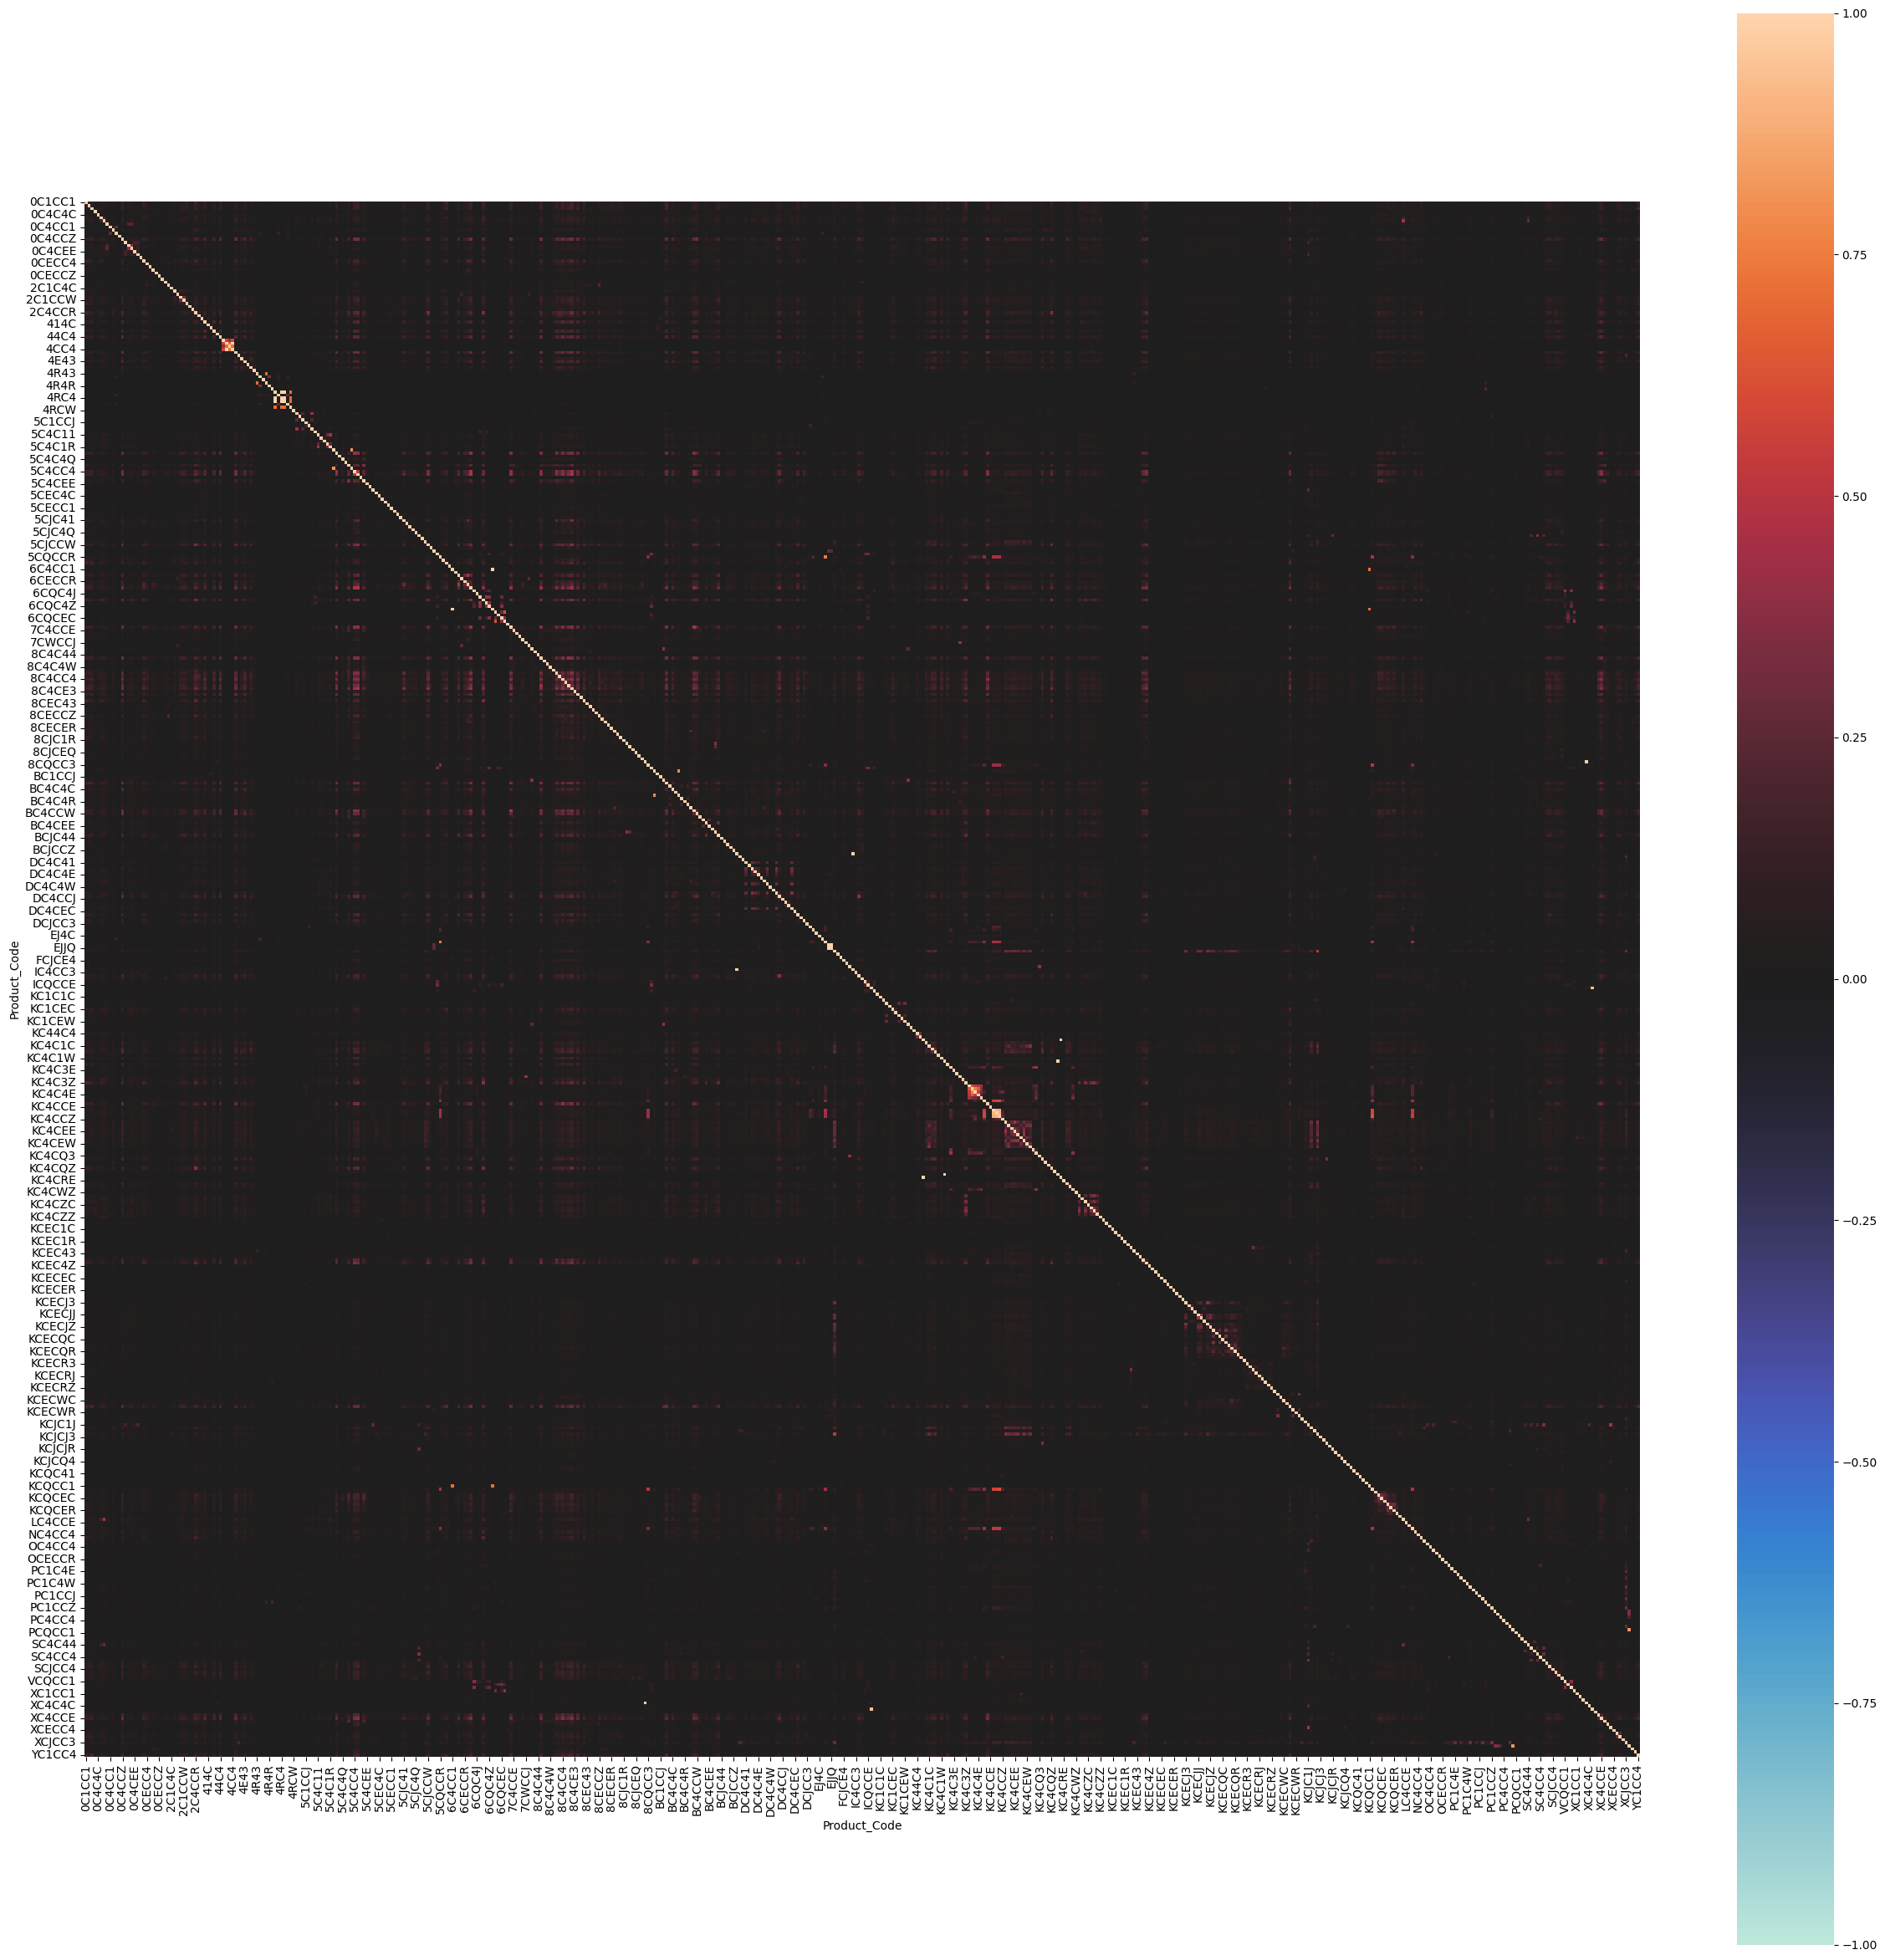

In [16]:
# And optionally, use the heatmap to display the Item to Item similarity matrix.
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize = (30,30))
ax = sns.heatmap(
    item_item_similarity_matrix,
    vmin=-1, vmax=1, center=0,
    square=True)

In [1]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
from scipy.sparse import csr_matrix
import random

# Load a subset of the dataset (adjust nrows as needed)
data_path = '/content/trans_prep_recommendation_final.csv'
nrows = 50000  # Number of rows to load (adjust as needed)
random.seed(42)  # Set a seed for reproducibility
skip_rows = sorted(random.sample(range(1, 2000000), 2000000 - nrows))
df = pd.read_csv(data_path, skiprows=skip_rows)

# Create a user-item matrix
user_item_matrix = df.pivot_table(index='ent', columns='Product_Code', values='Product_Qty_sum', fill_value=0)
user_item_matrix_sparse = csr_matrix(user_item_matrix)

# Calculate cosine similarity
cosine_sim_matrix = cosine_similarity(user_item_matrix_sparse)

# Create a DataFrame for cosine similarity
cosine_sim_df = pd.DataFrame(cosine_sim_matrix, index=user_item_matrix.index, columns=user_item_matrix.index)

# Function to recommend Product_Code based on similarity
def recommend_products(ent, num_recommendations=5):
    if ent not in cosine_sim_df.index:
        return "Entity not found in the database."

    # Get the cosine similarity scores for the given entity
    sim_scores = cosine_sim_df.loc[ent]

    # Sort entities by similarity scores in descending order
    sim_scores = sim_scores.sort_values(ascending=False)

    # Get the top N most similar entities (excluding itself)
    top_entities = sim_scores.iloc[1:num_recommendations+1].index

    # Get the products for the top entities
    recommended_products = df[df['ent'].isin(top_entities)]['Product_Code'].unique()

    return recommended_products

# Example: Recommend 3 products for a random 'ent'
random_ent = df['ent'].sample(1).iloc[0]
recommended_products = recommend_products(random_ent, num_recommendations=3)
print(f"Recommended Products for {random_ent}: {recommended_products}")


Recommended Products for TCC4WRWJC4Y: ['8C4CEW' '6C1CCE']
